In [1]:
import tensorflow.keras
import pandas as pd

tensorflow.keras.__version__

'2.12.0'

* 로이터뉴스 데이터셋(1986년에 로이터에서 공개한 짧은 뉴스기사 + 토픽 집합)
* 46개의 토픽
* 훈련세트에 최소한 10개의 각 토픽을 보유

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
                reuters.load_data(num_words=10000)

In [3]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [4]:
test_data.shape, test_data.shape

((2246,), (2246,))

In [5]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [6]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [7]:
max(train_labels)

45

In [8]:
min(train_labels)

0

In [9]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

reuters_df = pd.DataFrame(train_data_df)
reuters_df.columns=['train_data']
reuters_df['train_labels'] = train_labels_df
reuters_df

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [10]:
reuters_df.shape

(8982, 2)

In [11]:
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    8982 non-null   object
 1   train_labels  8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [12]:
reuters_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [13]:
reuters_df.iloc[:,0]

0       [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...
1       [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...
2       [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...
3       [1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...
4       [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...
                              ...                        
8977    [1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...
8978    [1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...
8979    [1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...
8980    [1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...
8981    [1, 227, 2406, 91, 2, 125, 2855, 21, 4, 3976, ...
Name: train_data, Length: 8982, dtype: object

In [14]:
reuters_df.loc[:]['train_data']

0       [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...
1       [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...
2       [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...
3       [1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...
4       [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...
                              ...                        
8977    [1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...
8978    [1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...
8979    [1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...
8980    [1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...
8981    [1, 227, 2406, 91, 2, 125, 2855, 21, 4, 3976, ...
Name: train_data, Length: 8982, dtype: object

In [15]:
max([max(sequence) for sequence in train_data])

9999

In [16]:
len([max(sequence) for sequence in train_data])

8982

In [17]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') \
                             for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 준비

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [19]:
# 방법1
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [20]:
# 방법2
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 모델 구성

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [34]:
# 방법1 : loss='categorical_crossentropy'
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
# 방법2 : loss='sparse_categorical_crossentropy'
'''
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              '''

## 훈련 검증

In [35]:
# 방법1 : loss='categorical_crossentropy'
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:].astype(float)

y_val = one_hot_train_labels[:1000].astype(float)
partial_y_train = one_hot_train_labels[1000:].astype(float)

In [25]:
# 방법2 : loss='sparse_categorical_crossentropy'
'''
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:].astype(float)

y_val = train_labels[:1000].astype(float)
partial_y_train = train_labels[1000:].astype(float)
'''

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 22ms/step - loss: 2.6171 - accuracy: 0.4579 - val_loss: 1.7812 - val_accuracy: 0.6000
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5334 - accuracy: 0.6676 - val_loss: 1.3815 - val_accuracy: 0.6780
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1878 - accuracy: 0.7354 - val_loss: 1.1981 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9672 - accuracy: 0.7886 - val_loss: 1.0603 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8002 - accuracy: 0.8261 - val_loss: 0.9878 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6646 - accuracy: 0.8597 - val_loss: 0.9517 - val_accuracy: 0.7850
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5580 - accuracy: 0.8819 - val_loss: 0.9003 - val_accuracy: 0.8070
Epoch 8/20
16

* 손실과 정확도 곡선

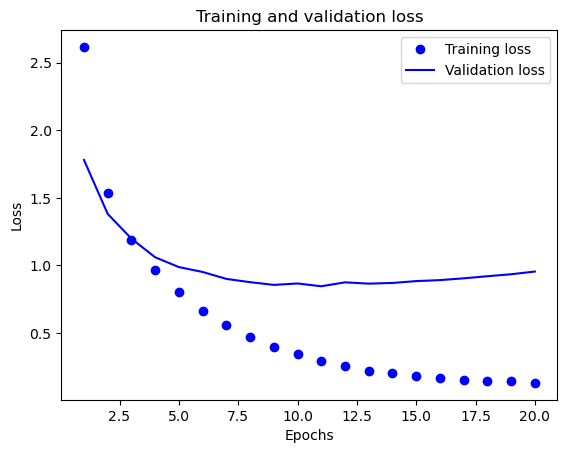

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

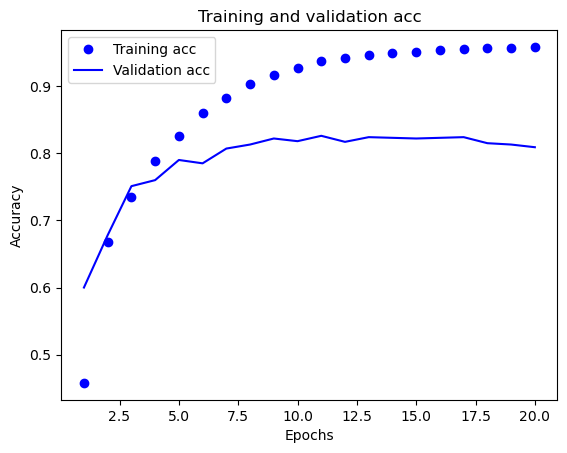

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

model.fit(partial_x_train,
        partial_y_train,
        epochs=9,
        batch_size=512,
        validation_data=(x_val,y_val))

result = model.evaluate(x_test,one_hot_test_labels)
result

Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.5907 - accuracy: 0.5048 - val_loss: 1.7774 - val_accuracy: 0.5950
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.4814 - accuracy: 0.6819 - val_loss: 1.3542 - val_accuracy: 0.6980
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.1565 - accuracy: 0.7548 - val_loss: 1.1887 - val_accuracy: 0.7390
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.9568 - accuracy: 0.7975 - val_loss: 1.0778 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.7920 - accuracy: 0.8272 - val_loss: 1.0202 - val_accuracy: 0.7640
Epoch 6/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6667 - accuracy: 0.8539 - val_loss: 0.9429 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 0s 16ms/step - loss: 0.5547 - accuracy: 0.8811 - val_loss: 0.9036 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

[0.9584677219390869, 0.7773820161819458]

In [37]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [38]:
predictions[0]

array([2.6835984e-05, 5.9988577e-04, 1.5151671e-04, 7.2167522e-01,
       2.3963866e-01, 4.0498526e-05, 9.0282381e-04, 2.5316552e-04,
       4.0552500e-03, 8.2220366e-05, 4.4206297e-04, 2.3900569e-04,
       4.2419895e-04, 4.1837615e-04, 3.1012128e-04, 4.3976459e-05,
       2.8606942e-03, 1.0028775e-03, 3.2172070e-04, 1.0989435e-02,
       6.7519178e-03, 9.1247208e-04, 2.6635447e-05, 3.9614347e-04,
       2.4731792e-04, 1.4331298e-04, 5.9064955e-06, 1.2924129e-04,
       2.2566042e-04, 2.1477909e-04, 3.5416897e-04, 1.6085184e-03,
       4.1665489e-04, 7.7351593e-05, 1.6760092e-03, 2.7389975e-05,
       5.6794303e-04, 5.9788930e-05, 1.0060773e-04, 1.1144235e-03,
       6.0779137e-05, 1.0108938e-04, 3.3527773e-05, 2.1676399e-04,
       1.7070641e-06, 5.1358606e-05], dtype=float32)

In [39]:
len(predictions[0])

46

In [41]:
predictions[0].shape

(46,)

In [42]:
np.sum(predictions[0])

1.0000001

In [43]:
np.argmax(predictions[0])

3